# Imports

In [423]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Data Loading and Cleaning 

Data Loading and quick survey

In [424]:
df = pd.read_csv("../data/customer_transactions.csv")

print(df.isnull().sum()) #amount of null datapoints per column 
print(df.dtypes) #check types of columns 


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase Frequency        0
Total Sales               0
Country                   0
dtype: int64
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Purchase Frequency         int64
Total Sales                int64
Country                   object
dtype: object


Handling missing values

In [425]:

# Replace missing values in interger columns by the median 
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].fillna(df[col].median())


# Replace missing values in categorical columns by the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

Checking datatypes and removing duplicates or irrelevant records

In [426]:
# Remove exact duplicate rows
df = df.drop_duplicates()

# Remove duplicates in CustomerID(keep first occurrence)
df = df.drop_duplicates(subset=['CustomerID'], keep='first')

#Keep rows with integer and positive CustomerID, Age, Annual Income, Purchase Frequency, and Total Sales
df = df[df['CustomerID'].apply(lambda x: isinstance(x, int) and x > 0)]
df = df[df['Age'].apply(lambda x: isinstance(x, int) and x > 0)]
df = df[df['Annual Income (k$)'].apply(lambda x: isinstance(x, int) and x > 0)]
df = df[df['Purchase Frequency'].apply(lambda x: isinstance(x, int) and x > 0)]
df = df[df['Total Sales'].apply(lambda x: isinstance(x, int) and x > 0)]

#Keep rows with integer spending score between 1-100
df = df[df['Spending Score (1-100)'].apply(lambda x: isinstance(x, int) and x > 0 and x < 101)]


#Keep rows with male or female genders only 
df = df[df['Gender'].isin(['Male', 'Female'])]


In [427]:
# Save the cleaned dataframe to the data folder
df.to_csv("../data/cleaned_data.csv", index=False)

# EDA and Visualization

In [428]:
# summary stats for numeric columns
print(df.describe())   

# For categorical columns
print(df['Gender'].value_counts())
print(df['Country'].value_counts())


       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    50.00000  50.000000           50.000000               50.000000   
mean     25.50000  35.000000           60.000000               70.000000   
std      14.57738   7.142857           14.285714               14.285714   
min       1.00000  25.000000           40.000000               50.000000   
25%      13.25000  30.000000           50.000000               60.000000   
50%      25.50000  35.000000           60.000000               70.000000   
75%      37.75000  40.000000           70.000000               80.000000   
max      50.00000  45.000000           80.000000               90.000000   

       Purchase Frequency  Total Sales  
count           50.000000    50.000000  
mean             3.000000  2500.000000  
std              1.428571  1428.571429  
min              1.000000   500.000000  
25%              2.000000  1500.000000  
50%              3.000000  2500.000000  
75%              4.000000  3

In [429]:
# Average spending score by gender
print(df.groupby('Gender')['Spending Score (1-100)'].mean())
#Average Total Sales by gender 
print(df.groupby('Gender')['Total Sales'].mean())
#Average Annual Income by gender 
print(df.groupby('Gender')['Annual Income (k$)'].mean())



Gender
Female    70.0
Male      70.0
Name: Spending Score (1-100), dtype: float64
Gender
Female    2500.0
Male      2500.0
Name: Total Sales, dtype: float64
Gender
Female    60.0
Male      60.0
Name: Annual Income (k$), dtype: float64


In [430]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Purchase Frequency', 'Total Sales']
corr_matrix = df[numeric_cols].corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100),Purchase Frequency,Total Sales
Age,1.0,1.0,1.0,1.0,1.0
Annual Income (k$),1.0,1.0,1.0,1.0,1.0
Spending Score (1-100),1.0,1.0,1.0,1.0,1.0
Purchase Frequency,1.0,1.0,1.0,1.0,1.0
Total Sales,1.0,1.0,1.0,1.0,1.0


Graphs

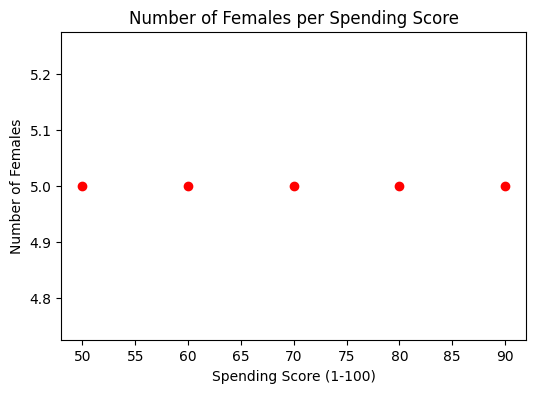

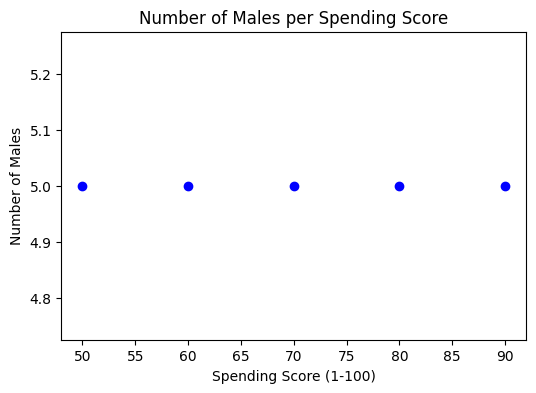

In [431]:
# Count females per spending score
female_counts = df[df['Gender']=='Female'].groupby('Spending Score (1-100)').size().reset_index(name='Count')

# Count males per spending score
male_counts = df[df['Gender']=='Male'].groupby('Spending Score (1-100)').size().reset_index(name='Count')

# Female scatterplot
plt.figure(figsize=(6,4))
plt.scatter(female_counts['Spending Score (1-100)'], female_counts['Count'], color='red')
plt.title('Number of Females per Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Females')
plt.show()

# Male scatterplot
plt.figure(figsize=(6,4))
plt.scatter(male_counts['Spending Score (1-100)'], male_counts['Count'], color='blue')
plt.title('Number of Males per Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Males')
plt.show()

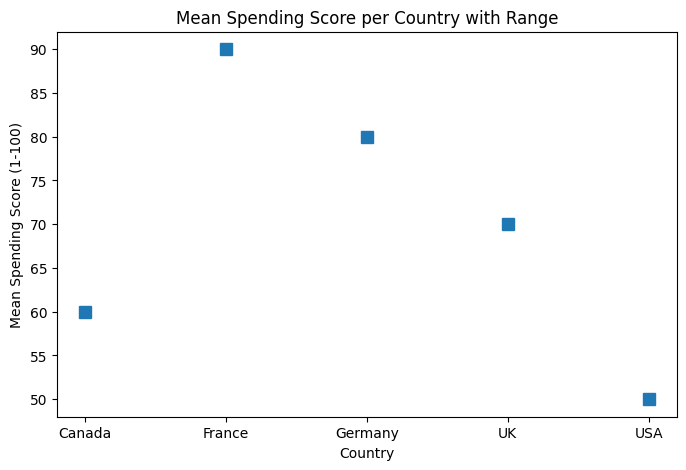

In [432]:

# Group by Country and calculate mean, min, and max
summary = df.groupby('Country')['Spending Score (1-100)'].agg(['mean', 'min', 'max']).reset_index()

# Calculate range for error bars
summary['range'] = summary['max'] - summary['min']


plt.figure(figsize=(8,5))

plt.errorbar(x=summary['Country'], 
             y=summary['mean'], 
             yerr=summary['range']/2,  # half-range above & below mean
             fmt='s', 
             markersize=8)

plt.title('Mean Spending Score per Country with Range')
plt.xlabel('Country')
plt.ylabel('Mean Spending Score (1-100)')
plt.show()

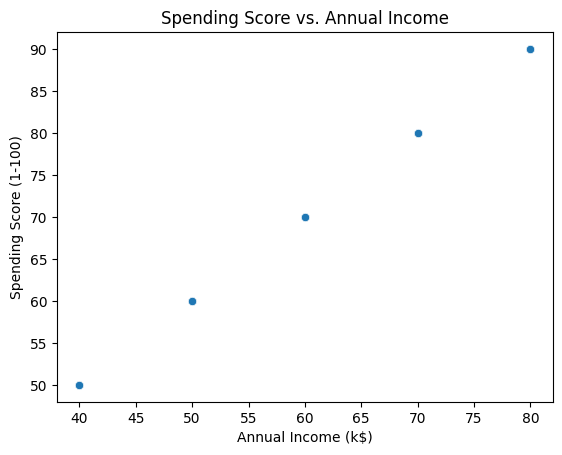

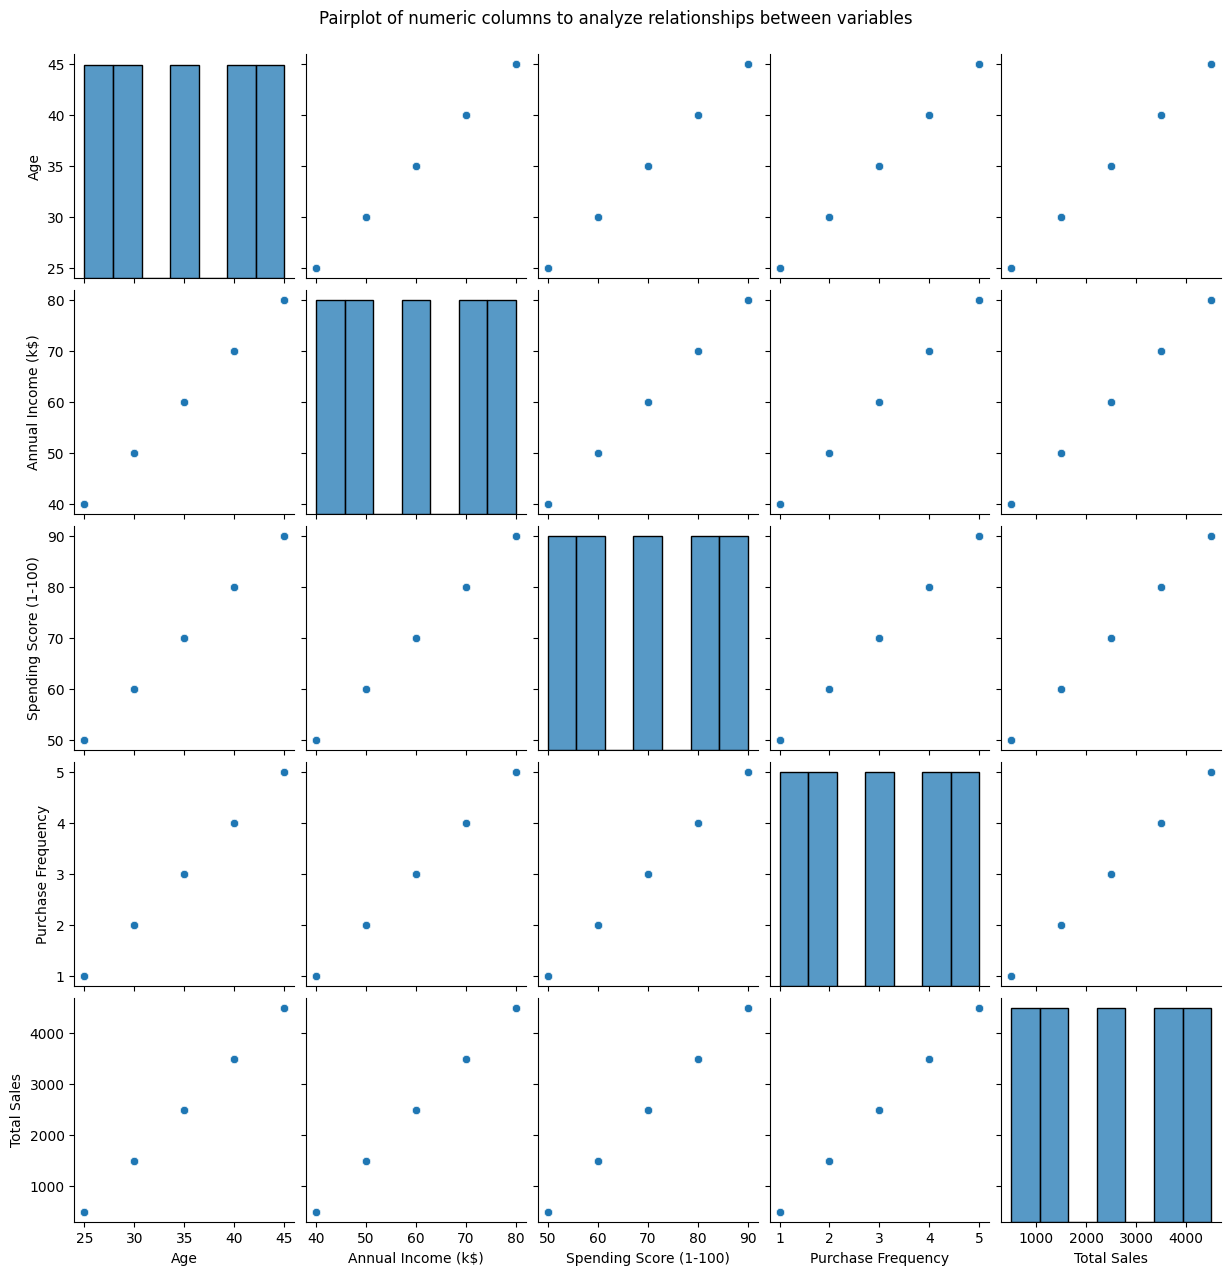

In [433]:

# Scatter plot: Spending Score vs Income
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Spending Score vs. Annual Income')
plt.show()

# Pairplot for numeric features
g=sns.pairplot(df[numeric_cols])
g.figure.suptitle("Pairplot of numeric columns to analyze relationships between variables", y=1.02) 
plt.show()



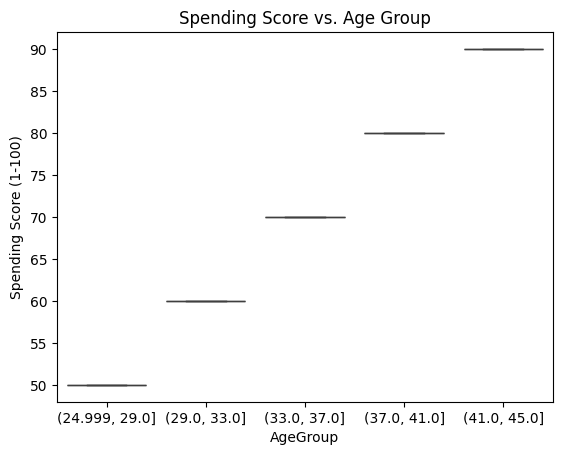

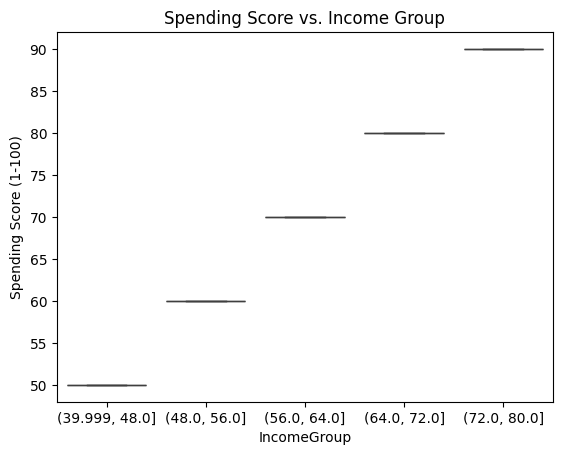

In [434]:
age_min = df['Age'].min()
age_max = df['Age'].max()

income_min = df['Annual Income (k$)'].min()
income_max = df['Annual Income (k$)'].max()

# 5 age groups
age_bins = np.linspace(age_min, age_max, 6) 
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, include_lowest=True)

# 5 income groups
income_bins = np.linspace(income_min, income_max, 6)
df['IncomeGroup'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, include_lowest=True)

sns.boxplot(data=df, x='AgeGroup', y='Spending Score (1-100)')  
plt.title('Spending Score vs. Age Group')
plt.show()

sns.boxplot(data=df, x='IncomeGroup', y='Spending Score (1-100)')  
plt.title('Spending Score vs. Income Group')
plt.show()


## Customer Segmentation

/Users/nooshinsoheili/Desktop/Boundaryai/Data-Analytics-Challenge/myenv/lib/python3.11/site-packages/sklearn/base.py:1365: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


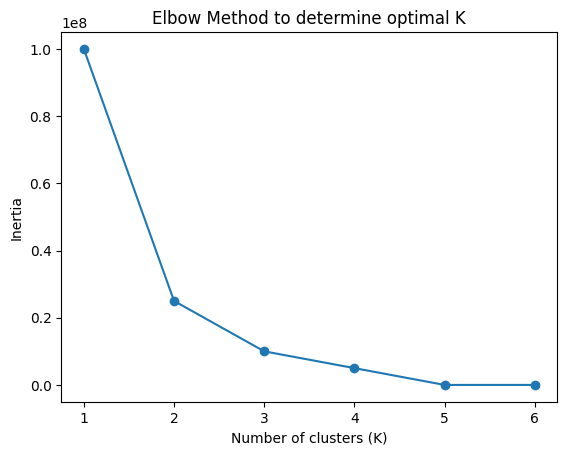

In [435]:

inertia = []
K_range = range(1, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_cols])  # Use numeric columns for clustering
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to determine optimal K')
plt.show()

Complete convergence happens at K=5 due to the specific pattern in the provided data but choosing K=5 would overfit the data so based on the elbow method, K=2 is the elbow where the rate of decrease in inertia (within-cluster sum of squares (WCSS)) slows down significantly. Therefore, K is chosen as 2 for the rest of this notebook. 

In [436]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numeric_cols])


In [437]:
# Renaming clusters based on the increasing mean in Spending Score within each cluster (Better Visualization)

cluster_order = df.groupby('cluster')['Spending Score (1-100)'].mean().sort_values().index.tolist()
mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_order)}
df['cluster'] = df['cluster'].map(mapping)

Describing and visualizing each customer segment 

In [438]:
cluster_summary = df.groupby('cluster')[numeric_cols].agg(['mean', 'median', 'count'])
cluster_summary


Age              Annual Income (k$)               \
         mean median count               mean median count   
cluster                                                      
0        27.5   27.5    20               45.0   45.0    20   
1        40.0   40.0    30               70.0   70.0    30   

        Spending Score (1-100)              Purchase Frequency               \
                          mean median count               mean median count   
cluster                                                                       
0                         55.0   55.0    20                1.5    1.5    20   
1                         80.0   80.0    30                4.0    4.0    30   

        Total Sales                
               mean  median count  
cluster                            
0            1000.0  1000.0    20  
1            3500.0  3500.0    30

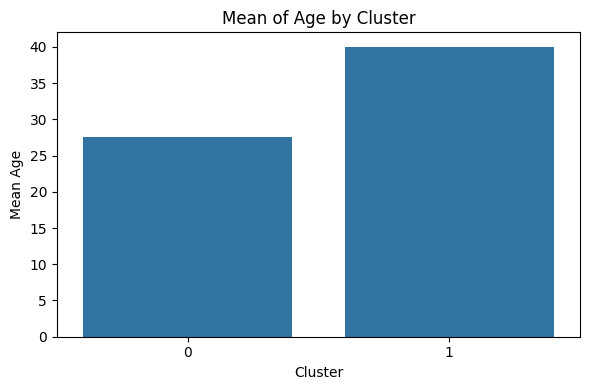

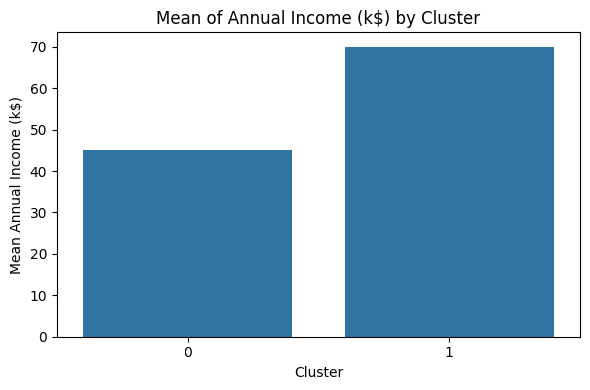

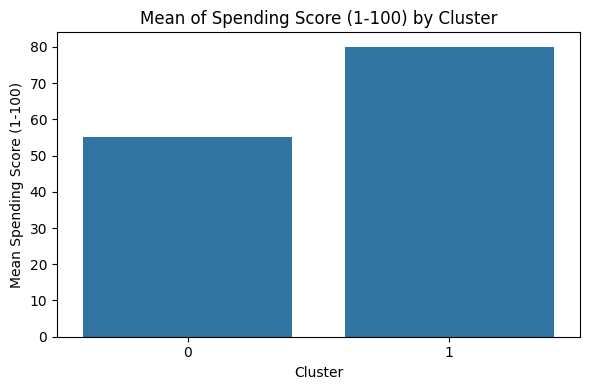

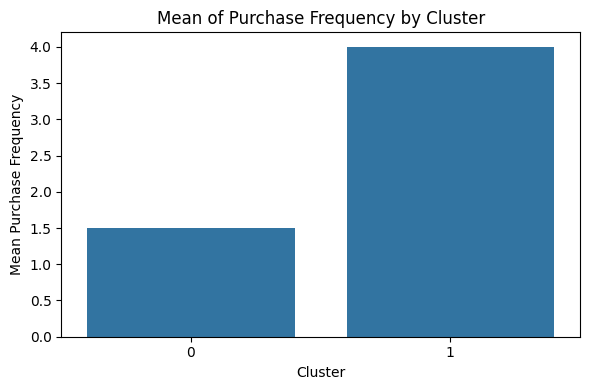

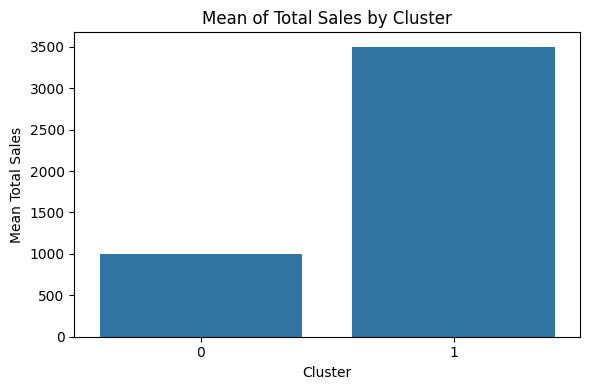

In [439]:
cluster_means = df.groupby('cluster')[numeric_cols].mean().reset_index()

for feature in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(data=cluster_means, x='cluster', y=feature)
    plt.title(f'Mean of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.tight_layout()
    plt.show()

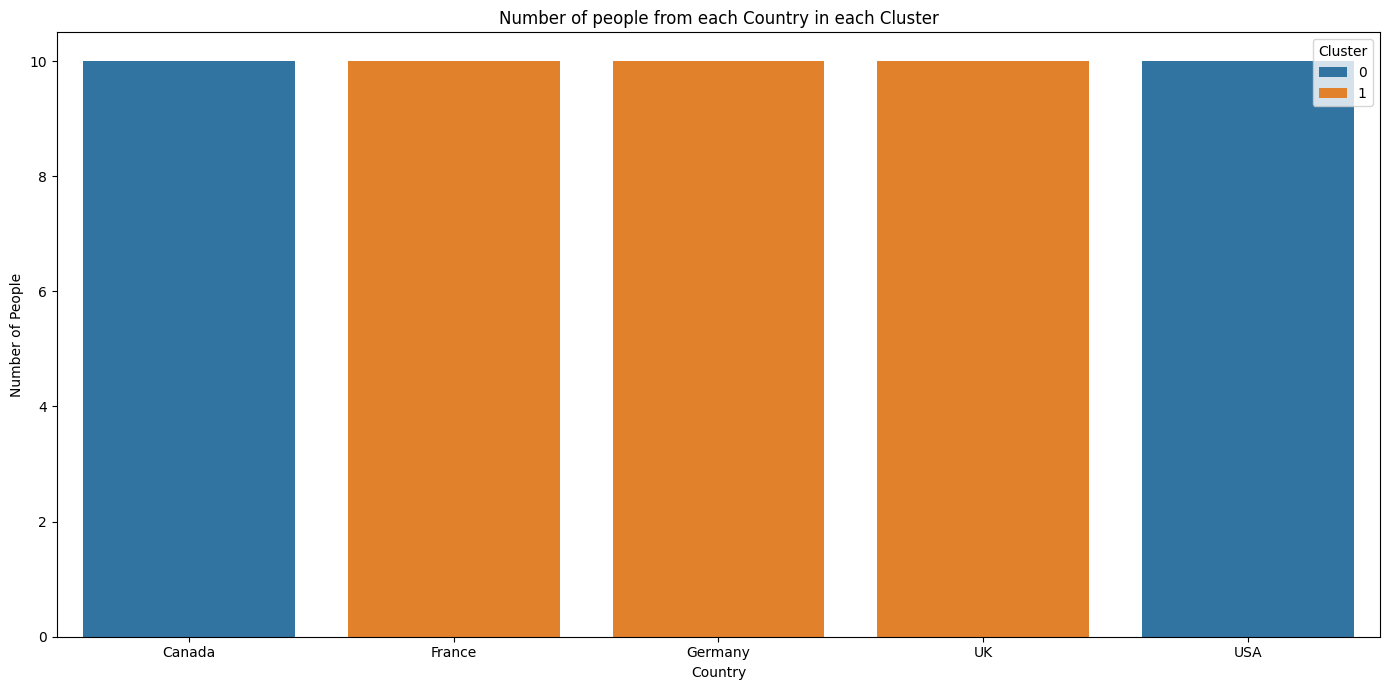

In [440]:
counts = df.groupby(['Country', 'cluster']).size().reset_index(name='count')

plt.figure(figsize=(14,7))
sns.barplot(data=counts, x='Country', y='count', hue='cluster')

plt.title('Number of people from each Country in each Cluster')
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


## Customer Analysis Summary & Key Takeaways

1. Balanced Customer Representation

Gender: Equal number of female and male customers (25 each).

Country: Equal representation from USA, Canada, UK, Germany, and France (10 customers each).

Takeaway: This balanced dataset suggests more equitable analysis, reducing bias and improving the reliability of insights.

2. Gender Insights

Mean Values: Annual income ($60k), total sales (2500), and spending score (70) are identical for both genders.

Distribution: Equal number of people across spending scores in both genders.

Business Implication: Marketing strategies targeting gender alone are unlikely to affect sales; spending behavior is similar across genders.

3. Country-Level Differences

Spending Score Means (descending): France (90), Germany (80), UK (70), Canada (60), USA (50).

Business Implication: European countries (France, Germany, UK) show higher spending power. Prioritize targeted marketing campaigns in Europe to maximize returns.

4. Correlations & Demographics

Linear Relationships: Age positively correlates with annual income, purchase frequency, total sales, and spending score.

Top Spending Segment: Customers aged 41-45 with higher income ($72-80k) drive the highest spending.

Business Implication: Focus advertising and offers on older, higher-income customers to boost sales.

5. Customer Segmentation (Clusters)

Cluster 0: Lower mean age, income, spending score, purchase frequency, and total sales. Includes all customers from USA and Canada.

Cluster 1: Higher means for all above metrics. Comprises customers from Europe.

Business Implication: Cluster 1 represents more valuable customers; emphasizing European markets can improve business outcomes.

6. Overall Recommendations

Marketing Focus: Prioritize European customers over North American ones.

Target Audience: Focus on older adults with higher income brackets.

Strategy: Tailor campaigns geographically and demographically to maximize sales growth.